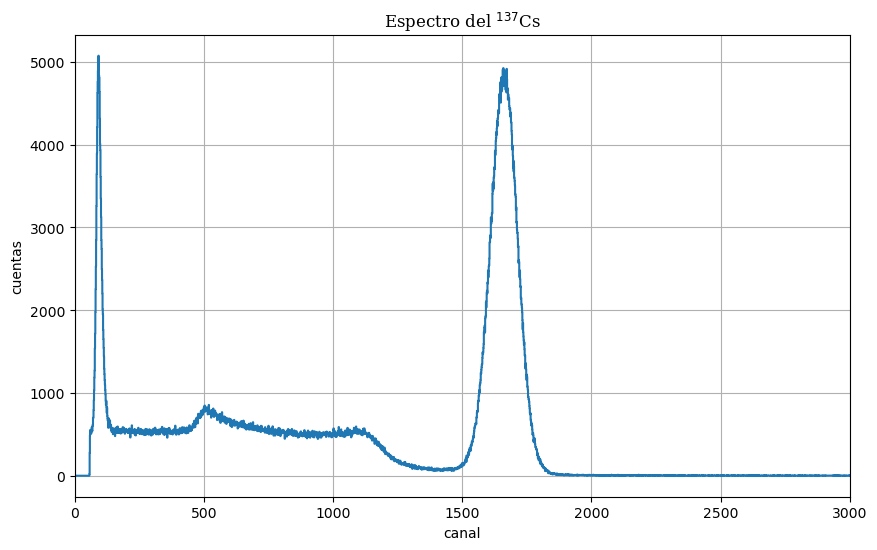

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

datos_csv = "Cs137.csv"
df = pd.read_csv("./data/Cs137_5minNaI.csv")
#df = df[(df["canal"] >= 0) & (df["canal"] <= 2000)]

canal = df["canal"]
cuentas = df["cuentas"]

plt.figure(figsize=(10, 6))
plt.plot(canal, cuentas, ds="steps-mid")
plt.title(r"Espectro del $^{137}$Cs",family="serif")
plt.xlabel("canal")
plt.ylabel("cuentas")
plt.xlim(0,3000)
plt.grid()
plt.show()

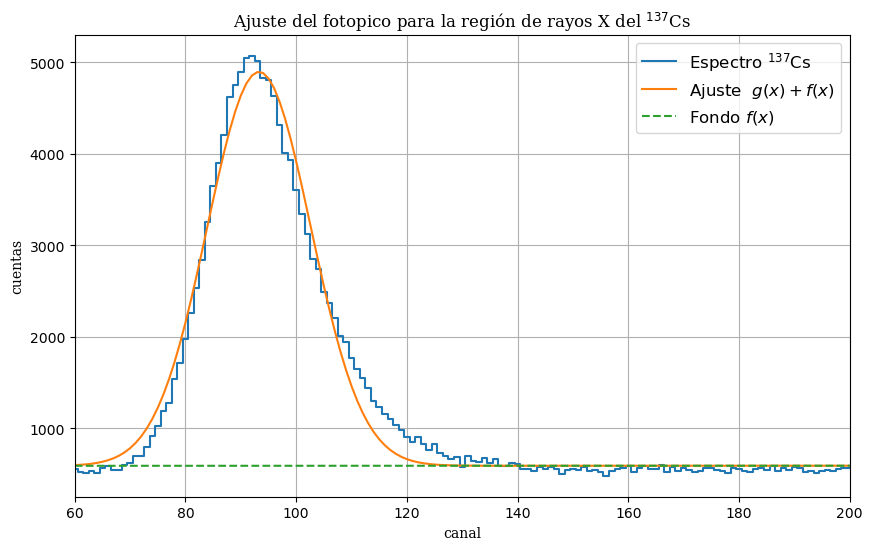

Parámetros ajustados:
b0_optimizado: 587.6953658308682
b1_optimizado: -0.007167880141918748
M_optimizado: 4309.116304337476
mu_optimizado: 93.28620390031256
sigma_optimizado: 9.344743806330063


In [46]:
df1 = df[(df["canal"] >= 60) & (df["canal"] <= 200)]
canal1 = df1["canal"]
cuentas1 = df1["cuentas"]

def r(x, b0, b1, mu):
    return b0 + b1*(mu - x)
def f(x, b0, b1, M, mu, sigma):
    return (b0 + b1 * (mu - x)) + (M * np.exp(-(mu - x) ** 2 / (2 * sigma ** 2)))

parametros_iniciales = [500, 0.36, 4520, 92, 12]

parametros_optimizados, _ = curve_fit(f, canal1, cuentas1, p0=parametros_iniciales)
b0_optimizado, b1_optimizado, M_optimizado, mu_optimizado, sigma_optimizado = parametros_optimizados

plt.figure(figsize=(10, 6))
plt.plot(canal1, cuentas1,  ds = "steps-mid", label = r"Espectro $^{137}$Cs")
plt.plot(canal1, f(canal1, b0_optimizado, b1_optimizado, M_optimizado, mu_optimizado, sigma_optimizado), label = r"Ajuste  $g(x)+f(x)$")
plt.plot(canal1, r(canal1, b0_optimizado, b1_optimizado, mu_optimizado), linestyle = "dashed", label = r"Fondo $f(x)$")

plt.title(r"Ajuste del fotopico para la región de rayos X del $^{137}$Cs",family="serif")
plt.xlabel("canal", family = "serif")
plt.ylabel("cuentas", family = "serif")
plt.legend(fontsize=12)
plt.xlim(60,200)
plt.grid()
plt.show()

print(f"Parámetros ajustados:")
print(f"b0_optimizado: {b0_optimizado}")
print(f"b1_optimizado: {b1_optimizado}")
print(f"M_optimizado: {M_optimizado}")
print(f"mu_optimizado: {mu_optimizado}")
print(f"sigma_optimizado: {sigma_optimizado}")

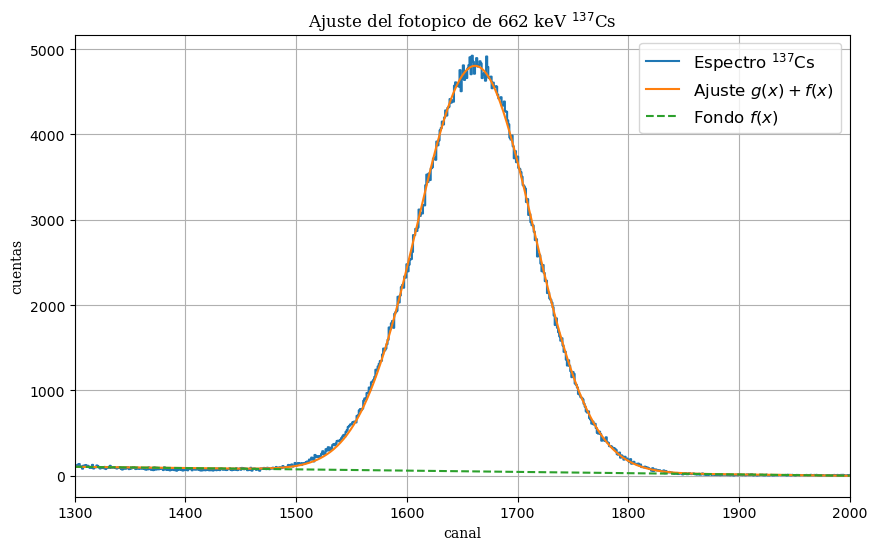

Parámetros ajustados:
b0_optimizado: 51.21892059806022
b1_optimizado: 0.14948638043731077
M_optimizado: 4753.312361346941
mu_optimizado: 1661.566188441374
sigma_optimizado: 52.320491129352554


In [47]:
df2 = df[(df["canal"] >= 1300) & (df["canal"] <= 2000)]
canal2 = df2["canal"]
cuentas2 = df2["cuentas"]

def r(x, b0, b1, mu):
    return b0 + b1*(mu - x)
def f(x, b0, b1, M, mu, sigma):
    return (b0 + b1 * (mu - x)) + (M * np.exp(-(mu - x) ** 2 / (2 * sigma ** 2)))

parametros_iniciales = [100, 0.1, 4850, 1670, 50]

parametros_optimizados, _ = curve_fit(f, canal2, cuentas2, p0=parametros_iniciales)
b0_optimizado, b1_optimizado, M_optimizado, mu_optimizado, sigma_optimizado = parametros_optimizados

plt.figure(figsize=(10, 6))
plt.plot(canal2, cuentas2, ds = "steps-mid", label = r"Espectro $^{137}$Cs")
plt.plot(canal2, f(canal2, b0_optimizado, b1_optimizado, M_optimizado, mu_optimizado, sigma_optimizado), label = r"Ajuste $g(x)+f(x)$ ")
plt.plot(canal2, r(canal2, b0_optimizado, b1_optimizado, mu_optimizado), linestyle = "dashed", label = r"Fondo $f(x)$ ")

plt.title(r"Ajuste del fotopico de 662 keV $^{137}$Cs",family="serif")
plt.xlabel("canal", family = "serif")
plt.ylabel("cuentas", family = "serif")
plt.legend(fontsize=12)
plt.xlim(1300,2000)
plt.grid()
plt.show()

print(f"Parámetros ajustados:")
print(f"b0_optimizado: {b0_optimizado}")
print(f"b1_optimizado: {b1_optimizado}")
print(f"M_optimizado: {M_optimizado}")
print(f"mu_optimizado: {mu_optimizado}")
print(f"sigma_optimizado: {sigma_optimizado}")